La función $f(x) = \tan{(\pi x)}-6$ tiene cero en $(1/\pi) \arctan{(6)} \approx 0.447431543$. Sea $p_0 = 0$ y $p_1 = 0.48$ y use $10$ iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

Raíz aproximada usando el método de bisección:  0.44775390625
Raíz aproximada usando el método de Newton:  0.4474315432887487
Raíz aproximada usando el método de la secante:  -2989.9400375314453


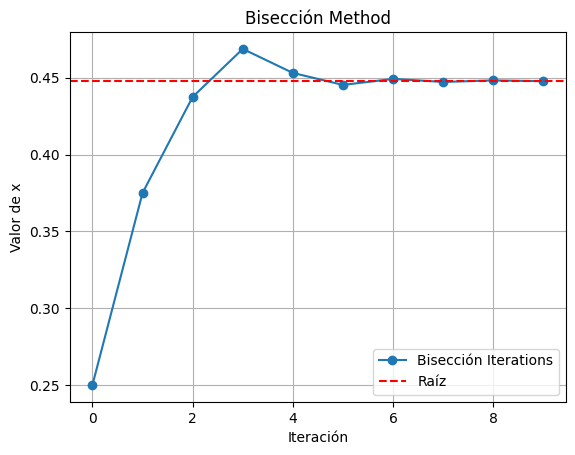

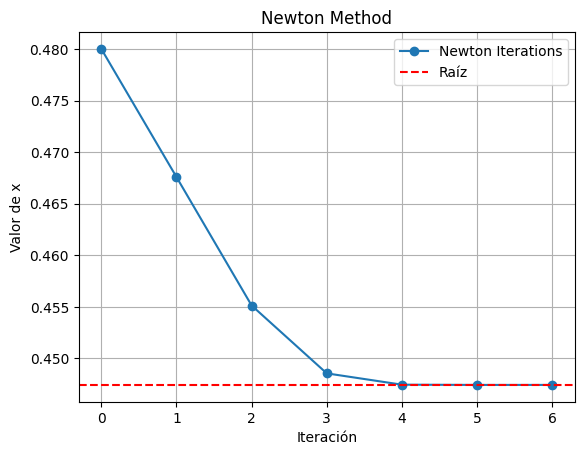

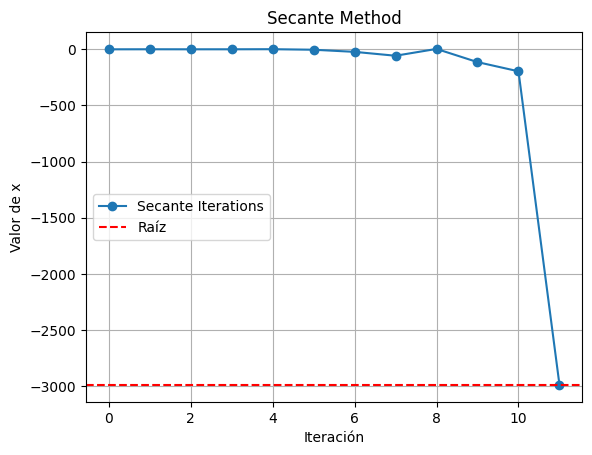

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función y su derivada
def f(x):
    return np.tan(np.pi * x) - 6

def df(x):
    return np.pi * (1 / np.cos(np.pi * x))**2

# Método de Bisección
def bisection_method(a, b, tol=1e-10, max_iter=10):
    iterations = []
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe cambiar de signo en el intervalo [a, b]")
    for i in range(max_iter):
        c = (a + b) / 2
        iterations.append(c)
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, iterations
        if np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
    return c, iterations

# Método de Newton
def newton_method(p0, tol=1e-10, max_iter=10):
    iterations = [p0]
    p = p0
    for i in range(max_iter):
        if df(p) == 0:
            raise ValueError("La derivada se anula en la iteración, el método no puede continuar.")
        p = p - f(p) / df(p)
        iterations.append(p)
        if abs(f(p)) < tol:
            break
    return p, iterations

# Método de la Secante
def secant_method(p0, p1, tol=1e-10, max_iter=10):
    iterations = [p0, p1]
    for i in range(max_iter):
        if f(p1) - f(p0) == 0:
            raise ValueError("Diferencia nula en el denominador, el método no puede continuar.")
        p = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        p0, p1 = p1, p
        iterations.append(p)
        if abs(f(p)) < tol:
            break
    return p, iterations

# Parámetros iniciales
a = 0
b = 0.5
p0_newton = 0.48
p0_secant = 0
p1_secant = 0.48

# Ejecutar métodos
try:
    root_bisection, iterations_bisection = bisection_method(a, b)
    print("Raíz aproximada usando el método de bisección: ", root_bisection)
except ValueError as e:
    print(f"Error en el método de bisección: {e}")

try:
    root_newton, iterations_newton = newton_method(p0_newton)
    print("Raíz aproximada usando el método de Newton: ", root_newton)
except ValueError as e:
    print(f"Error en el método de Newton: {e}")

try:
    root_secant, iterations_secant = secant_method(p0_secant, p1_secant)
    print("Raíz aproximada usando el método de la secante: ", root_secant)
except ValueError as e:
    print(f"Error en el método de la secante: {e}")

# Función para graficar las iteraciones
def plot_iterations(iterations, method_name, root):
    plt.plot(iterations, 'o-', label=f'{method_name} Iterations')
    plt.axhline(y=root, color='r', linestyle='--', label='Raíz')
    plt.xlabel('Iteración')
    plt.ylabel('Valor de x')
    plt.title(f'{method_name} Method')
    plt.legend()
    plt.grid()
    plt.show()

# Graficar iteraciones de cada método
if 'iterations_bisection' in locals():
    plot_iterations(iterations_bisection, 'Bisección', root_bisection)
if 'iterations_newton' in locals():
    plot_iterations(iterations_newton, 'Newton', root_newton)
if 'iterations_secant' in locals():
    plot_iterations(iterations_secant, 'Secante', root_secant)
